In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from datetime import timedelta

%matplotlib inline
import matplotlib.pyplot as plt

### Load all dataframes

In [18]:
oil_df = pd.read_csv("oil.csv")
holiday_df = pd.read_csv("holidays_events.csv")
stores_df = pd.read_csv("stores.csv")
train_df = pd.read_csv("train.csv")
transactions_df = pd.read_csv("transactions.csv")

In [19]:
oil_df["dcoilwtico"] = oil_df["dcoilwtico"].ffill()

### Merge into one

In [16]:
train_df = train_df.merge(oil_df, how = 'left', on = 'date')
train_df = train_df.merge(stores_df, how = 'left', on = 'store_nbr')
train_df = train_df.merge(holiday_df, how = 'left', on = 'date')
train_df = train_df.merge(transactions_df, how = 'left', on = ['date', 'store_nbr'])

KeyError: 'date'

In [5]:
train_df.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type_x,cluster,type_y,locale,locale_name,description,transferred,transactions
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,NaN,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,NaN,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0,NaN,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0,NaN,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,NaN
4,4,2013-01-01,1,BOOKS,0.0,0,NaN,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,NaN


### Sum by day

In [54]:
daysum_df = pd.DataFrame(train_df.groupby(['date'])['sales', 'onpromotion', 'transactions'].sum())
daysum_df.reset_index(inplace=True)
daysum_df = daysum_df.merge(oil_df, how = 'left', on = 'date')

daysum_df = daysum_df.rename(columns={'dcoilwtico':'oil_price'})
daysum_df['date'] = pd.to_datetime(daysum_df['date'])

daysum_df.head()

/var/folders/kl/rhj278752jx5vc4jhwh_0m2r0000gn/T/ipykernel_37447/3580663552.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  daysum_df = pd.DataFrame(train_df.groupby(['date'])['sales', 'onpromotion', 'transactions'].sum())


,date,sales,onpromotion,transactions,oil_price
0,2013-01-01,2511.618999,0,25410.0,NaN
1,2013-01-02,496092.417944,0,3076095.0,93.14
2,2013-01-03,361461.231124,0,2590632.0,92.97
3,2013-01-04,354459.677093,0,2590302.0,93.12
4,2013-01-05,477350.121229,0,3087909.0,NaN


In [55]:
daysum_df.corr()

,sales,onpromotion,transactions,oil_price
sales,1.000000,0.595648,0.732975,-0.626216
onpromotion,0.595648,1.000000,0.273294,-0.633225
transactions,0.732975,0.273294,1.000000,-0.172159
oil_price,-0.626216,-0.633225,-0.172159,1.000000


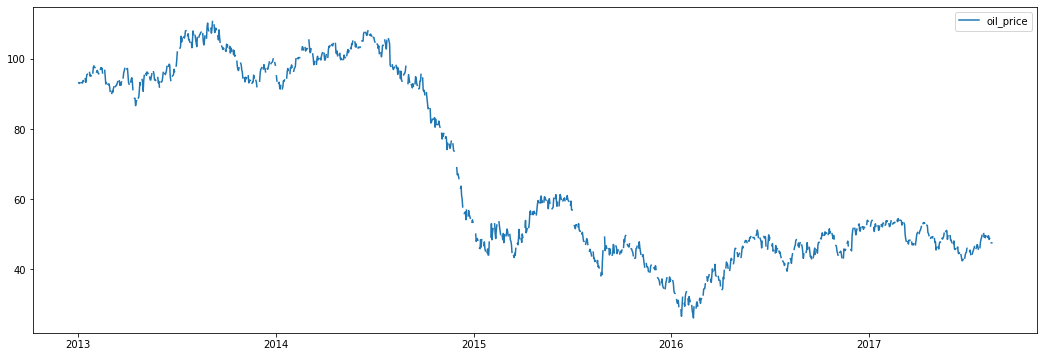

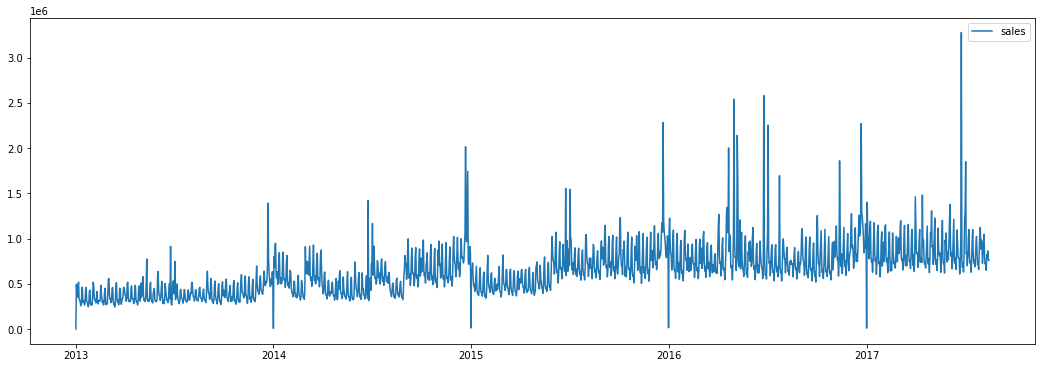

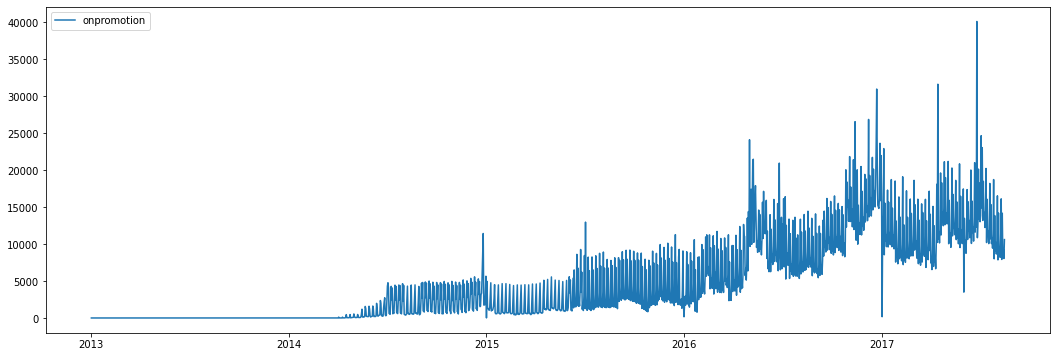

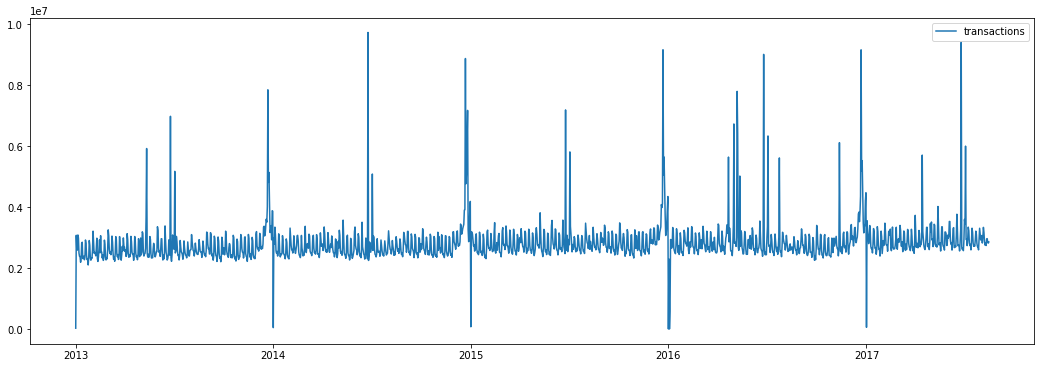

In [64]:
plt.figure(figsize=(18, 6))
plt.plot(daysum_df['date'], daysum_df['oil_price'], label = 'oil_price')
plt.legend()
plt.show()

plt.figure(figsize=(18, 6))
plt.plot(daysum_df['date'], daysum_df['sales'], label = 'sales')
plt.legend()
plt.show()


plt.figure(figsize=(18, 6))
plt.plot(daysum_df['date'], daysum_df['onpromotion'], label = 'onpromotion')
plt.legend()
plt.show()


plt.figure(figsize=(18, 6))
plt.plot(daysum_df['date'], daysum_df['transactions'], label = 'transactions')
plt.legend()
plt.show()

### Sum by day and store number

In [65]:
daystoresum_df = pd.DataFrame(train_df.groupby(['date', 'store_nbr'])['sales', 'onpromotion', 'transactions'].sum())
daystoresum_df.reset_index(inplace=True)
daystoresum_df = daystoresum_df.merge(oil_df, how = 'left', on = 'date')

daystoresum_df = daystoresum_df.rename(columns={'dcoilwtico':'oil_price'})
daystoresum_df['date'] = pd.to_datetime(daystoresum_df['date'])

daystoresum_df.head()

/var/folders/kl/rhj278752jx5vc4jhwh_0m2r0000gn/T/ipykernel_37447/318062219.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  daystoresum_df = pd.DataFrame(train_df.groupby(['date', 'store_nbr'])['sales', 'onpromotion', 'transactions'].sum())


,date,store_nbr,sales,onpromotion,transactions,oil_price
0,2013-01-01,1,0.0,0,0.0,NaN
1,2013-01-01,2,0.0,0,0.0,NaN
2,2013-01-01,3,0.0,0,0.0,NaN
3,2013-01-01,4,0.0,0,0.0,NaN
4,2013-01-01,5,0.0,0,0.0,NaN


In [66]:
daystoresum_df.corr()

,store_nbr,sales,onpromotion,transactions,oil_price
store_nbr,1.000000e+00,0.144648,0.025460,0.103442,-2.934266e-15
sales,1.446479e-01,1.000000,0.377258,0.860831,-2.891561e-01
onpromotion,2.546038e-02,0.377258,1.000000,0.204055,-5.344500e-01
transactions,1.034424e-01,0.860831,0.204055,1.000000,-5.492777e-02
oil_price,-2.934266e-15,-0.289156,-0.534450,-0.054928,1.000000e+00


### Sum by thing

In [70]:
thingsum_df = pd.DataFrame(train_df.groupby(['date', 'family'])['sales', 'onpromotion', 'transactions'].sum())
thingsum_df.reset_index(inplace=True)
thingsum_df = thingsum_df.merge(oil_df, how = 'left', on = 'date')


thingsum_df = thingsum_df.rename(columns={'dcoilwtico':'oil_price'})
thingsum_df['date'] = pd.to_datetime(thingsum_df['date'])

thingsum_df.head()

/var/folders/kl/rhj278752jx5vc4jhwh_0m2r0000gn/T/ipykernel_37447/1676617688.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  thingsum_df = pd.DataFrame(train_df.groupby(['date', 'family'])['sales', 'onpromotion', 'transactions'].sum())


,date,family,sales,onpromotion,transactions,oil_price
0,2013-01-01,AUTOMOTIVE,0.0,0,770.0,NaN
1,2013-01-01,BABY CARE,0.0,0,770.0,NaN
2,2013-01-01,BEAUTY,2.0,0,770.0,NaN
3,2013-01-01,BEVERAGES,810.0,0,770.0,NaN
4,2013-01-01,BOOKS,0.0,0,770.0,NaN


In [71]:
thingsum_df.corr()

,sales,onpromotion,transactions,oil_price
sales,1.000000,0.577926,0.127143,-0.098740
onpromotion,0.577926,1.000000,0.086671,-0.195021
transactions,0.127143,0.086671,1.000000,-0.172159
oil_price,-0.098740,-0.195021,-0.172159,1.000000
